In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DarkNews import const
from DarkNews import Cfourvec as Cfv
from alp import plot_tools as pt

from alp import exp, models

## Experiments

In [730]:
alp = models.ALP(0.5, 1e5)
FASER  = exp.Experiment(LHC_files, exp_dic=exp.FASER_exp, alp=alp)
FASER.get_event_rate(alp)
alp2 = models.ALP(0.5, 1e2)
FASER.get_event_rate(alp), FASER.reweight(alp_old=alp, alp_new=alp2)

(np.float64(359.6604371715026), np.float64(0.0))

In [731]:
effs = []
for i in range(1, 10):
    MICROBOONE  = exp.Experiment(NUMI_files, exp_dic=exp.MicroBooNE_exp, alp=alp, duplicate_taus=1)
    MICROBOONE.get_event_rate(alp)
    effs.append(MICROBOONE.eff)

In [732]:
effs_5 = []
for i in range(1, 10):
    MICROBOONE  = exp.Experiment(NUMI_files, exp_dic=exp.MicroBooNE_exp, alp=alp, duplicate_taus=10)
    MICROBOONE.get_event_rate(alp)
    effs_5.append(MICROBOONE.eff)

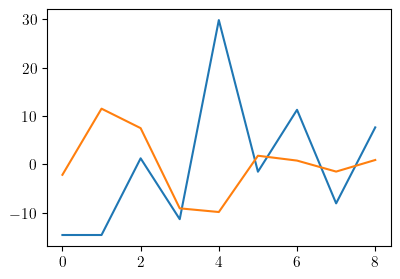

In [733]:
plt.plot(100*(effs - np.average(effs))/np.average(effs))
plt.plot(100*(effs_5 - np.average(effs_5))/np.average(effs_5))

In [774]:
alp = models.ALP(0.3, 1e8)

### Pythia8 tau events
NUMI_files  = [f"pythia8_events/tau_events_NuMI_120GeV_v3_{i}.txt" for i in range(0, 8)] + [f"pythia8_events/tau_events_NuMI_120GeV_v4_{i}.txt" for i in range(0, 8)]
SPS_files   = [f"pythia8_events/tau_events_SPS_400GeV_v3_{i}.txt" for i in range(0, 8)] + [f"pythia8_events/tau_events_SPS_400GeV_v4_{i}.txt" for i in range(0, 8)]+ [f"pythia8_events/tau_events_SPS_400GeV_v5_{i}.txt" for i in range(0, 8)]
LHC_files   = [f"pythia8_events/tau_events_LHC_13.6TeV_v6_{i}.txt" for i in range(0, 8)] 

### Creating the experimental classes 
ICARUS      = exp.Experiment(NUMI_files, exp_dic=exp.ICARUS_exp, alp=alp, duplicate_taus=1)
MICROBOONE  = exp.Experiment(NUMI_files, exp_dic=exp.MicroBooNE_exp, alp=alp, duplicate_taus=1)
NOVA        = exp.Experiment(NUMI_files, exp_dic=exp.NoVA_exp, alp=alp, duplicate_taus=1)

CHARM = exp.Experiment(SPS_files, exp_dic=exp.CHARM_exp, alp=alp)
BEBC  = exp.Experiment(SPS_files, exp_dic=exp.BEBC_exp, alp=alp)
NA62  = exp.Experiment(SPS_files, exp_dic=exp.NA62_exp, alp=alp)
SHIP  = exp.Experiment(SPS_files, exp_dic=exp.SHiP_exp, alp=alp)

PROTODUNE_NP02 = exp.Experiment(SPS_files, exp_dic=exp.PROTO_DUNE_NP02_exp, alp=alp)
PROTODUNE_NP04 = exp.Experiment(SPS_files, exp_dic=exp.PROTO_DUNE_NP04_exp, alp=alp)

FASER  = exp.Experiment(LHC_files, exp_dic=exp.FASER_exp, alp=alp)
FASER2 = exp.Experiment(LHC_files, exp_dic=exp.FASER2_exp, alp=alp)

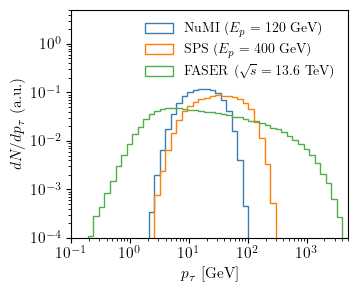

In [775]:
fig,ax = pt.std_fig(figsize=(3.5,3))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.geomspace(0.1, 5e3, 51)

p4, w = ICARUS.p4_taus, ICARUS.tau_weights
ax.hist(np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, bins=b, weights=w, label=r'NuMI ($E_p = 120$~GeV)', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w = SHIP.p4_taus, SHIP.tau_weights
ax.hist(np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, bins=b, weights=w, label=r'SPS ($E_p = 400$~GeV)', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w = FASER.p4_taus, FASER.tau_weights
ax.hist(np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, bins=b, weights=w, label=r'FASER ($\sqrt{s} = 13.6$~TeV)', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor='None', linestyle='-', density=False, zorder=1.9)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$p_{\tau}$ [GeV]')
ax.set_ylabel(r'$dN/d p_{\tau}$ (a.u.)')
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-4, 5)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=10, ncol=1)
fig.savefig('plots/tau_angular_spectrum.pdf', bbox_inches='tight')

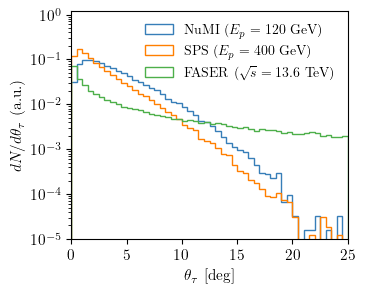

In [776]:
fig,ax = pt.std_fig(figsize=(3.5,3))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 25, 51)

p4, w = ICARUS.p4_taus, ICARUS.tau_weights
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w, label=r'NuMI ($E_p = 120$~GeV)', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w = SHIP.p4_taus, SHIP.tau_weights
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w, label=r'SPS ($E_p = 400$~GeV)', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w = FASER.p4_taus, FASER.tau_weights
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w, label=r'FASER ($\sqrt{s} = 13.6$~TeV)', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor='None', linestyle='-', density=False, zorder=1.9)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{\tau}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_\tau$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=10, ncol=1)
fig.savefig('plots/tau_angular_spectrum.pdf', bbox_inches='tight')

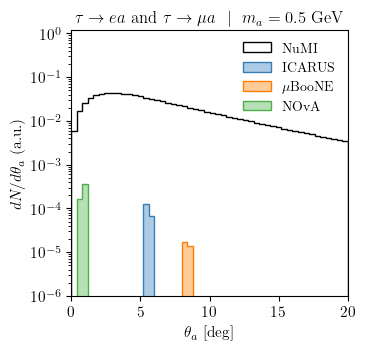

In [751]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 20, 51)

p4, w, channels = ICARUS.get_alp_events(alp=alp)
WNORM = np.sum(w)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='NuMI', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w, channels = ICARUS.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='ICARUS', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.2)

p4, w, channels = MICROBOONE.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'$\mu$BooNE', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)

p4, w, channels = NOVA.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'NOvA', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.2)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_a$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=12)
fig.savefig('plots/NuMI_alp_angular_spectrum.pdf', bbox_inches='tight')

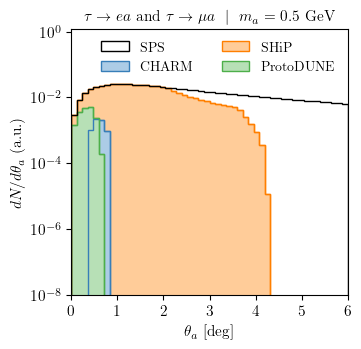

In [778]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 6, 51)

p4, w, channel = SHIP.get_alp_events(alp=alp)
WNORM = np.sum(w)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='SPS', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w, channels = CHARM.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='CHARM', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w, channels = SHIP.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'SHiP', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w, channels = PROTODUNE_NP02.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'ProtoDUNE', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.4)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], facecolor='None', linestyle='-', density=False, zorder=1.8)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_a$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-8, 1.2)
# ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=2)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/SPS_alp_angular_spectrum.pdf', bbox_inches='tight')

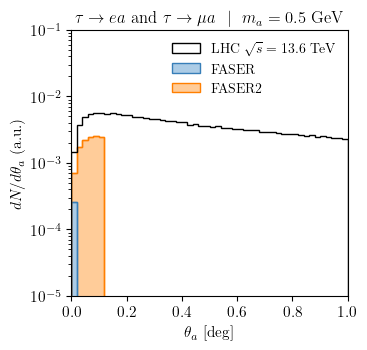

In [753]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 1, 51)

p4, w, channels = FASER2.get_alp_events(alp=alp)
WNORM = np.sum(w)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w, label=r'LHC $\sqrt{s} = 13.6$~TeV', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w, channels = FASER.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='FASER', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights =w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w, channels = FASER2.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'FASER2', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], facecolor='None', linestyle='-', density=False, zorder=1.8)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_a$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1e-1)
# ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=12)
fig.savefig('plots/LHC_alp_angular_spectrum.pdf', bbox_inches='tight')

In [754]:
def plot_hist_with_errors(ax, data, weights, bins, label, color, zorder=2, lw=1.5, nevents=1, ls='-'):
    # Compute histogram and sum of squared weights per bin
    counts, bin_edges = np.histogram(data, bins=bins, weights=weights*nevents)
    sumw2, _ = np.histogram(data, bins=bins, weights=np.square(weights*nevents))
    
    # Bin centers for plotting
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bin_widths = np.diff(bin_edges)

    counts /= nevents
    sumw2 /= nevents**2
    # Plot main histogram
    ax.hist(data, bins=bins, weights=weights, label=label, |
            histtype='step', edgecolor=color, linestyle=ls, 
            density=False, zorder=zorder, lw=lw)
    
    # Plot error bars as bars around each bin
#     ax.bar(bin_centers, 2*np.sqrt(sumw2), bottom=counts-np.sqrt(sumw2), width=bin_widths, edgecolor='None', facecolor=color, alpha=0.3, lw=0, zorder=zorder-0.1)


SyntaxError: invalid syntax (1207638320.py, line 13)

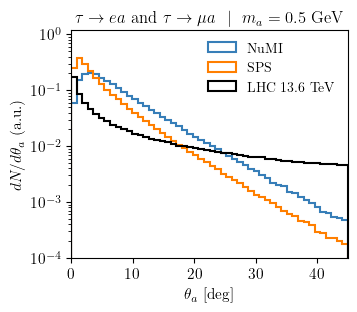

In [779]:
fig,ax = pt.std_fig(figsize=(3.5,3))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 45, 51)


ICARUS.get_alp_events(alp=alp)
CHARM.get_alp_events(alp=alp)
FASER.get_alp_events(alp=alp)

plot_hist_with_errors(ax, Cfv.get_theta_3vec(ICARUS.p4_alp)*xunits, ICARUS.weights, b, 'NuMI', pt.CB_color_cycle[0], nevents=ICARUS.nevents)
plot_hist_with_errors(ax, Cfv.get_theta_3vec(CHARM.p4_alp)*xunits, CHARM.weights, b, 'SPS', pt.CB_color_cycle[1], nevents=CHARM.nevents)
plot_hist_with_errors(ax, Cfv.get_theta_3vec(FASER.p4_alp)*xunits, FASER.weights, b, 'LHC $13.6$~TeV', 'black', nevents=FASER.nevents)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_a$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-4, 1.2)
# ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {model.m_a}$ GeV', fontsize=12)
fig.savefig('plots/All_alp_angular_spectrum.pdf', bbox_inches='tight')

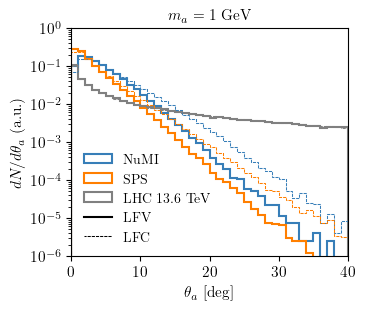

In [782]:
fig,ax = pt.std_fig(figsize=(3.5,3))

xunits = 180 / np.pi
b = np.linspace(0, 40, 41)
mALP = 1
alp = models.ALP(mALP, 1e5, c_lepton=np.diag([1,1,1]))
ICARUS.get_alp_events(alp=alp)
CHARM.get_alp_events(alp=alp)
FASER.get_alp_events(alp=alp)

plot_hist_with_errors(ax, Cfv.get_theta_3vec(ICARUS.p4_alp)*xunits, ICARUS.weights/np.sum(ICARUS.weights), b, 'NuMI', pt.CB_color_cycle[0], nevents=ICARUS.nevents)
plot_hist_with_errors(ax, Cfv.get_theta_3vec(CHARM.p4_alp)*xunits, CHARM.weights/np.sum(CHARM.weights), b, 'SPS', pt.CB_color_cycle[1], nevents=CHARM.nevents)
plot_hist_with_errors(ax, Cfv.get_theta_3vec(FASER.p4_alp)*xunits, FASER.weights/np.sum(FASER.weights), b, 'LHC $13.6$~TeV', 'grey', nevents=FASER.nevents)

alp = models.ALP(mALP, 1e5, c_lepton=np.ones((3,3)))
ICARUS.get_alp_events(alp=alp)
CHARM.get_alp_events(alp=alp)
FASER.get_alp_events(alp=alp)

plot_hist_with_errors(ax, Cfv.get_theta_3vec(ICARUS.p4_alp)*xunits, ICARUS.weights/np.sum(ICARUS.weights), b, None, pt.CB_color_cycle[0], nevents=ICARUS.nevents, ls=(1,(3,1)), lw=0.75)
plot_hist_with_errors(ax, Cfv.get_theta_3vec(CHARM.p4_alp)*xunits, CHARM.weights/np.sum(CHARM.weights), b, None, pt.CB_color_cycle[1], nevents=CHARM.nevents, ls=(1,(3,1)), lw=0.75)
plot_hist_with_errors(ax, Cfv.get_theta_3vec(FASER.p4_alp)*xunits, FASER.weights/np.sum(FASER.weights), b, None, 'grey', nevents=FASER.nevents, ls=(1,(3,1)), lw=0.75)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_a$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-6, 1)

ax.set_yticks(np.geomspace(1e-6, 1, 7))
# l1 = ax.legend(loc='upper right', fontsize=10, ncol=1)

l = []
# l.append(ax.plot([],[], ls='-', color=pt.CB_color_cycle[0], lw=0, label='\,\,')[0])
l.append(ax.plot([],[], ls='-', color='black', lw=1.5, label='LFV')[0])
l.append(ax.plot([],[], ls=(1,(3,1)), color='black', lw=0.75, label='LFC')[0])
# ax.add_artist(l1)
ax.legend(loc='lower left', fontsize=10, ncol=1)
ax.set_title(fr'$m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/All_alp_angular_spectrum_LFC.pdf', bbox_inches='tight')

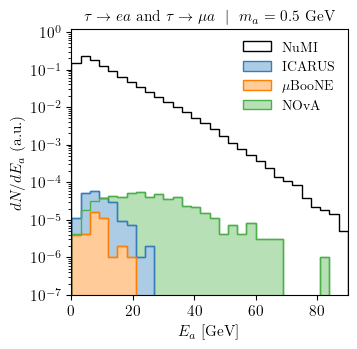

In [783]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
BINS = np.linspace(0, 90, 31)

p4_alp, w, channels = ICARUS.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4_alp[:,0], bins=BINS, weights=w/WNORM, label='NuMI', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w, channels = ICARUS.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, label='ICARUS', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.1)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)


p4, w, channels = MICROBOONE.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, label='$\mu$BooNE', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)


p4, w, channels = NOVA.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, label='NOvA', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.0)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-7, 1.2)
ax.set_yticks(np.geomspace(1e-7, 1, 8))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/NuMI_alp_spectrum_LFV.pdf', bbox_inches='tight')

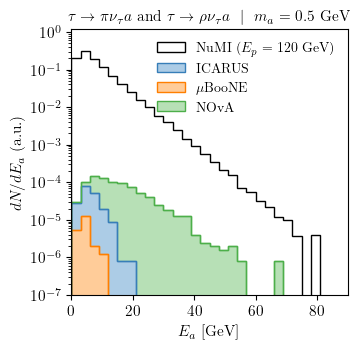

In [784]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e2, c_lepton=np.diag([1,1,1]))

xunits = 1
BINS = np.linspace(0, 90, 31)

p4_alp, w, channels = NOVA.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4_alp[:,0], bins=BINS, weights=w/WNORM, label=r'NuMI ($E_p = 120$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w, channels = ICARUS.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, label=r'ICARUS', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.1)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)


p4, w, channels = MICROBOONE.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, label=r'$\mu$BooNE', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)


p4, w, channels = NOVA.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, label=r'NOvA', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.0)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-7, 1.2)
ax.set_yticks(np.geomspace(1e-7, 1, 8))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to \pi\nu_\tau a$ and $\tau \to \rho \nu_\tau a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/NuMI_alp_spectrum_LFC.pdf', bbox_inches='tight')

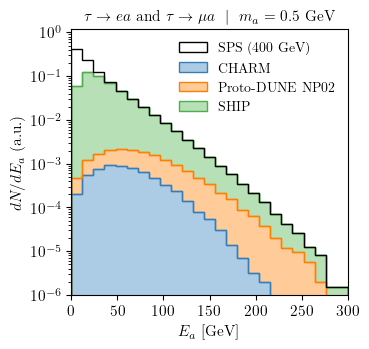

In [785]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
BINS = np.linspace(0, 300, 26)

p4, w, channels = SHIP.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='SPS (400 GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w, channels = CHARM.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='CHARM', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)

p4, w, channels = PROTODUNE_NP02.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='Proto-DUNE NP02', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)

p4, w, channels = SHIP.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='SHIP', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.1)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/SPS_alp_spectrum_LFV.pdf', bbox_inches='tight')

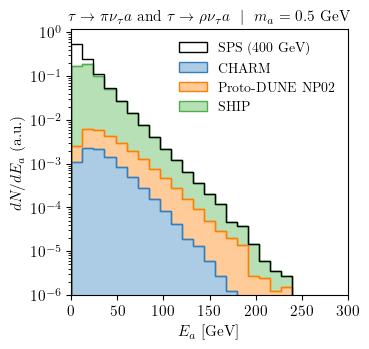

In [786]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e2, c_lepton=np.diag([1,1,1]))
xunits = 1
BINS = np.linspace(0, 300, 26)


p4, w, channels = SHIP.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='SPS (400 GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w, channels = CHARM.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='CHARM', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)

p4, w, channels = PROTODUNE_NP02.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='Proto-DUNE NP02', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)


p4, w, channels = SHIP.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='SHIP', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.1)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to \pi\nu_\tau a$ and $\tau \to \rho \nu_\tau a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/SPS_alp_spectrum_LFC.pdf', bbox_inches='tight')

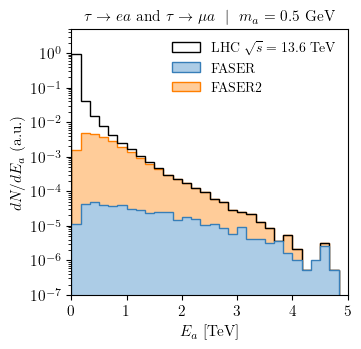

In [787]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 1e-3
BINS = np.linspace(0, 5, 31)

p4, w, channels = FASER2.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'LHC $\sqrt{s} = 13.6$~TeV', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w, channels = FASER.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='FASER', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=2)

p4, w, channels = FASER2.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='FASER2', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [TeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(0.1e-6, 5)
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/LHC_alp_spectrum_LFV.pdf', bbox_inches='tight')

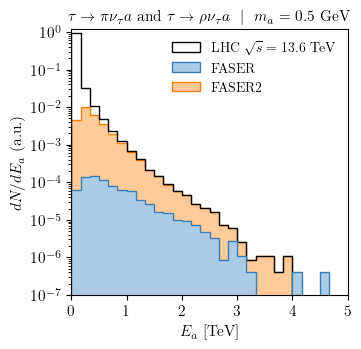

In [788]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e2, c_lepton=np.diag([1,1,1]))
xunits = 1e-3
BINS = np.linspace(0, 5, 31)

p4, w, channels = FASER2.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'LHC $\sqrt{s} = 13.6$~TeV', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w, channels = FASER.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='FASER', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=2)

p4, w, channels = FASER2.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label='FASER2', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [TeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(0.1e-6, 1.2)
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to \pi\nu_\tau a$ and $\tau \to \rho \nu_\tau a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/LHC_alp_spectrum_LFC.pdf', bbox_inches='tight')

In [789]:
f'{FASER.geom_acceptance*FASER.nevents:.2e} = {FASER.nevents} * {FASER.geom_acceptance:.2e}'
f'{FASER2.geom_acceptance*FASER2.nevents:.2e} = {FASER2.nevents} * {FASER2.geom_acceptance:.2e}'

AttributeError: 'Experiment' object has no attribute 'geom_acceptance'

## Acceptance vs ALP mass

AttributeError: 'Experiment' object has no attribute 'get_alp_spectrum'

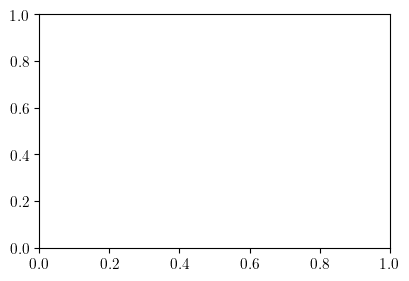

In [265]:
fig, ax = pt.std_fig()

malps = np.geomspace(2e-3, 1.6, 100)

for experiment in [ICARUS, MICROBOONE, NOVA, CHARM, NA62, BEBC, SHIP, FASER, FASER2]:
    effs = []
    for m in malps:
        experiment.get_alp_spectrum(m)
        effs.append(experiment.geom_acceptance)

    ax.plot(malps, effs, label=experiment.name)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(ncol=2)
ax.set_xlabel(r'$m_{a}$ [GeV]')
fig.savefig('plots/acceptance_versus_alp_mass.pdf', bbox_inches='tight', dpi=300)

NameError: name 'ctheta_tau_LAB' is not defined

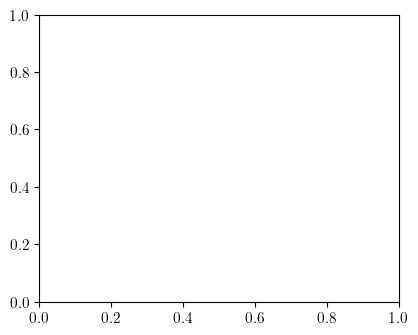

In [31]:
bins = np.linspace(0,50,30)
fig, ax = pt.std_fig()
_ = ax.hist(np.arccos(ctheta_tau_LAB)*180/np.pi, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(theta_alp_deg, bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)
# _ = plt.hist(df_taus.p, bins=20, histtype='step', color='black')#weights=df_taus.weight)

ax.set_title(fr'$\tau^\pm$ and $a$ angle wrt to $p^+$ ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend()
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_xlim(bins.min(), bins.max())

fig.savefig('plots/theta_tau_alp.pdf', bbox_inches='tight', dpi=300)

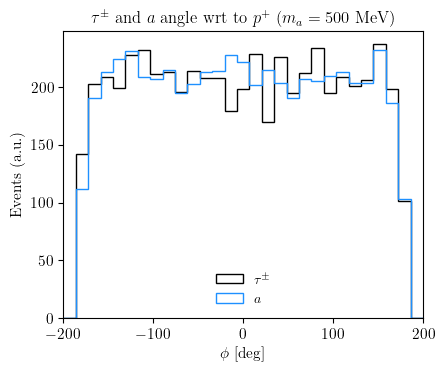

In [78]:
bins = np.linspace(-200,200,30)
fig, ax = pt.std_fig()
_ = ax.hist(phitau_LAB*180/np.pi, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(phi_alp_deg, bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)

ax.set_title(fr'$\tau^\pm$ and $a$ angle wrt to $p^+$ ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend()
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$\phi$ [deg]')
ax.set_xlim(bins.min(), bins.max())

fig.savefig('plots/phi_tau_alp.pdf', bbox_inches='tight', dpi=300)

In [86]:
Npoints=101
inv_fa = np.geomspace(1e-9,1e-2, Npoints, endpoint=True)
ma = np.geomspace(2e-3, const.m_tau - const.m_mu, Npoints, endpoint=True)
X, Y = np.meshgrid(ma, inv_fa)

def get_event_rate(ma, fa, dPhidp=1, palp=10, geom_acceptance = eff_dphi*0.03):
    if np.array(palp).size > 1:
        dp = np.diff(palp)
        pc = palp[:-1]+dp/2
        return tau_BR(ma, fa)*np.sum(dp*dPhidp*prob_decay(ma, pc, Gamma_alp(ma, fa), L, dZ)) * norm * geom_acceptance 
    else:
         return tau_BR(ma, fa)*dPhidp*prob_decay(ma, palp, Gamma_alp(ma, fa), L, dZ) * norm * geom_acceptance 

z = []
effs = []
for x, y in zip(X.ravel(), Y.ravel()):
    dPhidp, pb, eff = get_alp_spectrum(df_taus, x)
    effs.append(eff)
    z.append(get_event_rate(x, 1/y, dPhidp=dPhidp, palp=pb, geom_acceptance=eff_dphi * eff))

Z = np.reshape(z, X.shape)
EFFS = np.reshape(effs, X.shape)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:17: RuntimeWarning: invalid value encountered in sqrt
  gamma_mm = np.where(ma > 2*const.m_mu, 1/8/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - 4 * const.m_mu**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:18: RuntimeWarning: invalid value encountered in sqrt
  gamma_em = np.where(ma > const.m_e + const.m_mu, 1/16/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - (const.m_e+const.m_mu)**2 / ma**2), 0)


In [87]:
const.get_decay_rate_in_cm(Gamma_alp(1, 1e10) * 100 )  / 1e5

np.float64(301.2588462919711)

In [88]:
np.save('data/ICARUS_rate.npy', [X,Y,Z])

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:16: RuntimeWarning: invalid value encountered in sqrt
  gamma_ee = np.where(ma > 2*const.m_e, 1/8/np.pi * ma / f_a**2 * const.m_e**2 * np.sqrt(1 - 4 * const.m_e**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:17: RuntimeWarning: invalid value encountered in sqrt
  gamma_mm = np.where(ma > 2*const.m_mu, 1/8/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - 4 * const.m_mu**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:18: RuntimeWarning: invalid value encountered in sqrt
  gamma_em = np.where(ma > const.m_e + const.m_mu, 1/16/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - (const.m_e+const.m_mu)**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/3989625455.py:31: UserWarning: linewidths is ignored by contourf
  c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey

(0.01, 3)

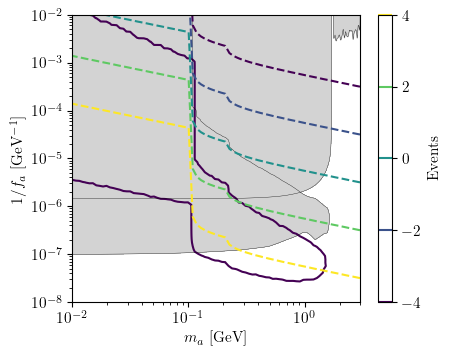

In [129]:
fig, ax = pt.std_fig()

X,Y,Z = np.load('data/ICARUS_rate.npy', allow_pickle=True)
c = ax.contour(X, Y, Z, levels=[1000])

# BaBar Limit
ma, qsi = np.genfromtxt("data/digitized/BABAR_leptophilic.dat", unpack=True)
ax.fill_between(ma, (1+(ma<const.m_tau - const.m_e)*1e100)*qsi/const.vev_EW, qsi/qsi, label='BABAR', color='lightgrey', linestyle='-')
ax.plot(ma, (1+(ma<const.m_tau - const.m_e)*1e100)*qsi/const.vev_EW, label='BABAR', color='black', linestyle='-', lw=0.25)

# Tau --> e alp 
# ma = np.geomspace(1e-3, const.m_tau - const.m_e, 1000)
# br_tau_to_e_alp = np.where(ma < const.m_tau - const.m_e, 1/16/np.pi * const.m_tau**3 * pow(1.-pow(ma/const.m_tau,2),2) / 2.3e-12, 0)
# ax.fill_between(ma, np.sqrt(2.7e-3/br_tau_to_e_alp), np.sqrt(1/br_tau_to_e_alp), facecolor='lightgrey', edgecolor='black', linestyle='--', zorder=-100)

# # Tau --> mu alp 
# ma = np.geomspace(1e-3, const.m_tau - const.m_mu, 1000)
# br_tau_to_mu_alp = np.where(ma < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * pow(1.-pow(ma/const.m_tau,2),2) / 2.3e-12, 0)
# ax.fill_between(ma, np.sqrt(4.5e-3/br_tau_to_mu_alp), np.sqrt(1/br_tau_to_mu_alp), facecolor='lightgrey', edgecolor='black', linestyle=':', zorder=-100)

ma = np.geomspace(1e-3, 3, 100)
inv_fa = np.geomspace(1e-9,1e-2, 100, endpoint=True)
MA, INV_FA = np.meshgrid(ma, inv_fa)

ma_limit, B_limit_90CL = np.genfromtxt("data/digitized/BelleII_tau_to_mu_a.dat", unpack=True)
B_limit_90CL_interp = np.interp(MA, ma_limit, B_limit_90CL, left=1e100, right=1e100)

p_alp_avg = 10.58/4
P_decay = prob_decay(MA, p_alp_avg, Gamma_alp(MA, 1/INV_FA), 100, 100e100) # 10 cm travel
BR_tau_mu_a = 1/B_limit_90CL_interp * P_decay * np.where(MA < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * INV_FA**2 * pow(1.-pow(MA/const.m_tau,2),2) / 2.3e-12, 0)
c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], linestyles='-', linewidths=[0.00], alpha=1)
c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1)

BR_tau_mu_a = np.where(MA < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * INV_FA**2 * pow(1.-pow(MA/const.m_tau,2),2) / 2.3e-12, 0)
c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1e-1,1e100], colors=['lightgrey'], linestyles='-',linewidths=[0.00], alpha=1)
c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1e-1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1)



Z = const.get_decay_rate_in_cm(Gamma_alp(MA, 1/INV_FA))
c=ax.contour(MA, INV_FA, np.log10(Z), levels=[-4,-2,0,2,4], cmap='viridis', linestyles='--', lw=0.1, alpha=1)
plt.colorbar(c, label='Events')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
ax.set_xlabel(r'$m_a$ [GeV]')

ax.set_ylim(1e-8,1e-2)
ax.set_xlim(1e-2,3)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DarkNews import const
from DarkNews import Cfourvec as Cfv
from DarkNews import plot_tools as pt

from alp import exp, models

In [ ]:
tau_per_POT = 5e-7
N_POT_NUMI = 3e21
norm = tau_per_POT * N_POT_NUMI
NUMI_files = [f"pythia8_events/tau_events_{i}.txt" for i in range(0, 7)]

ICARUS = exp.Experiment(NUMI_files, name="ICARUS", L = 803e2, theta0=5.55, dX = 2*2.67e2, dY = 2.86e2, dZ = 17.86e2, norm=norm)
test_alp = models.ALP(1e9, 0.1)

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:777: ComplexWarning: Casting complex values to real discards the imaginary part
  y[cond] = func(vals, *args, **kw)


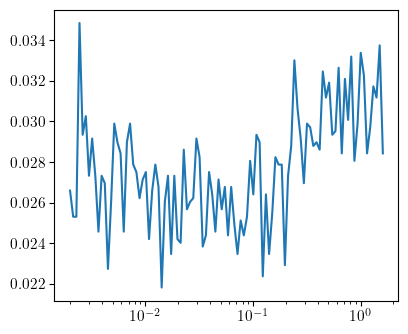

In [ ]:
malps = np.geomspace(2e-3, 1.6, 100)
effs = []
for m in malps:
    _, _, eff = get_alp_spectrum(df_taus, m)
    effs.append(eff)
plt.plot(malps, effs)
plt.xscale('log')

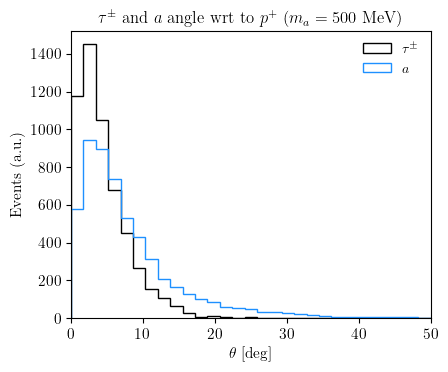

In [ ]:
bins = np.linspace(0,50,30)
fig, ax = pt.std_fig()
_ = ax.hist(np.arccos(ctheta_tau_LAB)*180/np.pi, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(theta_alp_deg, bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)
# _ = plt.hist(df_taus.p, bins=20, histtype='step', color='black')#weights=df_taus.weight)

ax.set_title(fr'$\tau^\pm$ and $a$ angle wrt to $p^+$ ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend()
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_xlim(bins.min(), bins.max())

fig.savefig('plots/theta_tau_alp.pdf', bbox_inches='tight', dpi=300)

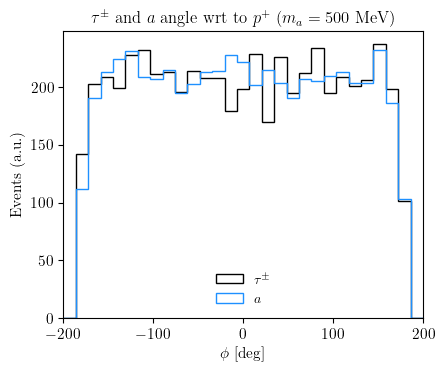

In [ ]:
bins = np.linspace(-200,200,30)
fig, ax = pt.std_fig()
_ = ax.hist(phitau_LAB*180/np.pi, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(phi_alp_deg, bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)

ax.set_title(fr'$\tau^\pm$ and $a$ angle wrt to $p^+$ ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend()
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$\phi$ [deg]')
ax.set_xlim(bins.min(), bins.max())

fig.savefig('plots/phi_tau_alp.pdf', bbox_inches='tight', dpi=300)

In [ ]:
Npoints=101
inv_fa = np.geomspace(1e-9,1e-2, Npoints, endpoint=True)
ma = np.geomspace(2e-3, const.m_tau - const.m_mu, Npoints, endpoint=True)
X, Y = np.meshgrid(ma, inv_fa)

def get_event_rate(ma, fa, dPhidp=1, palp=10, geom_acceptance = eff_dphi*0.03):
    if np.array(palp).size > 1:
        dp = np.diff(palp)
        pc = palp[:-1]+dp/2
        return tau_BR(ma, fa)*np.sum(dp*dPhidp*prob_decay(ma, pc, Gamma_alp(ma, fa), L, dZ)) * norm * geom_acceptance 
    else:
         return tau_BR(ma, fa)*dPhidp*prob_decay(ma, palp, Gamma_alp(ma, fa), L, dZ) * norm * geom_acceptance 

z = []
effs = []
for x, y in zip(X.ravel(), Y.ravel()):
    dPhidp, pb, eff = get_alp_spectrum(df_taus, x)
    effs.append(eff)
    z.append(get_event_rate(x, 1/y, dPhidp=dPhidp, palp=pb, geom_acceptance=eff_dphi * eff))

Z = np.reshape(z, X.shape)
EFFS = np.reshape(effs, X.shape)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:17: RuntimeWarning: invalid value encountered in sqrt
  gamma_mm = np.where(ma > 2*const.m_mu, 1/8/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - 4 * const.m_mu**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:18: RuntimeWarning: invalid value encountered in sqrt
  gamma_em = np.where(ma > const.m_e + const.m_mu, 1/16/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - (const.m_e+const.m_mu)**2 / ma**2), 0)


In [ ]:
const.get_decay_rate_in_cm(Gamma_alp(1, 1e10) * 100 )  / 1e5

np.float64(301.2588462919711)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:16: RuntimeWarning: invalid value encountered in sqrt
  gamma_ee = np.where(ma > 2*const.m_e, 1/8/np.pi * ma / f_a**2 * const.m_e**2 * np.sqrt(1 - 4 * const.m_e**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:17: RuntimeWarning: invalid value encountered in sqrt
  gamma_mm = np.where(ma > 2*const.m_mu, 1/8/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - 4 * const.m_mu**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:18: RuntimeWarning: invalid value encountered in sqrt
  gamma_em = np.where(ma > const.m_e + const.m_mu, 1/16/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - (const.m_e+const.m_mu)**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/3989625455.py:31: UserWarning: linewidths is ignored by contourf
  c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey

(0.01, 3)

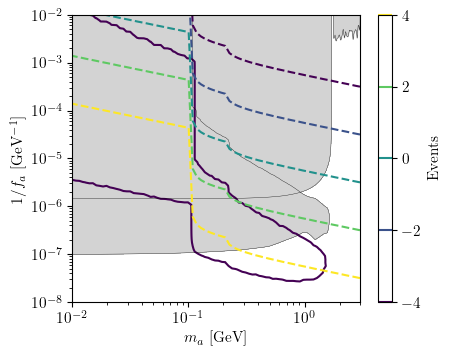

In [ ]:
fig, ax = pt.std_fig()

X,Y,Z = np.load('data/ICARUS_rate.npy', allow_pickle=True)
c = ax.contour(X, Y, Z, levels=[1000])

# BaBar Limit
ma, qsi = np.genfromtxt("data/digitized/BABAR_leptophilic.dat", unpack=True)
ax.fill_between(ma, (1+(ma<const.m_tau - const.m_e)*1e100)*qsi/const.vev_EW, qsi/qsi, label='BABAR', color='lightgrey', linestyle='-')
ax.plot(ma, (1+(ma<const.m_tau - const.m_e)*1e100)*qsi/const.vev_EW, label='BABAR', color='black', linestyle='-', lw=0.25)

# Tau --> e alp 
# ma = np.geomspace(1e-3, const.m_tau - const.m_e, 1000)
# br_tau_to_e_alp = np.where(ma < const.m_tau - const.m_e, 1/16/np.pi * const.m_tau**3 * pow(1.-pow(ma/const.m_tau,2),2) / 2.3e-12, 0)
# ax.fill_between(ma, np.sqrt(2.7e-3/br_tau_to_e_alp), np.sqrt(1/br_tau_to_e_alp), facecolor='lightgrey', edgecolor='black', linestyle='--', zorder=-100)

# # Tau --> mu alp 
# ma = np.geomspace(1e-3, const.m_tau - const.m_mu, 1000)
# br_tau_to_mu_alp = np.where(ma < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * pow(1.-pow(ma/const.m_tau,2),2) / 2.3e-12, 0)
# ax.fill_between(ma, np.sqrt(4.5e-3/br_tau_to_mu_alp), np.sqrt(1/br_tau_to_mu_alp), facecolor='lightgrey', edgecolor='black', linestyle=':', zorder=-100)

ma = np.geomspace(1e-3, 3, 100)
inv_fa = np.geomspace(1e-9,1e-2, 100, endpoint=True)
MA, INV_FA = np.meshgrid(ma, inv_fa)

ma_limit, B_limit_90CL = np.genfromtxt("data/digitized/BelleII_tau_to_mu_a.dat", unpack=True)
B_limit_90CL_interp = np.interp(MA, ma_limit, B_limit_90CL, left=1e100, right=1e100)

p_alp_avg = 10.58/4
P_decay = prob_decay(MA, p_alp_avg, Gamma_alp(MA, 1/INV_FA), 100, 100e100) # 10 cm travel
BR_tau_mu_a = 1/B_limit_90CL_interp * P_decay * np.where(MA < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * INV_FA**2 * pow(1.-pow(MA/const.m_tau,2),2) / 2.3e-12, 0)
c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], linestyles='-', linewidths=[0.00], alpha=1)
c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1)

BR_tau_mu_a = np.where(MA < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * INV_FA**2 * pow(1.-pow(MA/const.m_tau,2),2) / 2.3e-12, 0)
c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1e-1,1e100], colors=['lightgrey'], linestyles='-',linewidths=[0.00], alpha=1)
c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1e-1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1)



Z = const.get_decay_rate_in_cm(Gamma_alp(MA, 1/INV_FA))
c=ax.contour(MA, INV_FA, np.log10(Z), levels=[-4,-2,0,2,4], cmap='viridis', linestyles='--', lw=0.1, alpha=1)
plt.colorbar(c, label='Events')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
ax.set_xlabel(r'$m_a$ [GeV]')

ax.set_ylim(1e-8,1e-2)
ax.set_xlim(1e-2,3)

NameError: name 'mask_alp_in_acc' is not defined

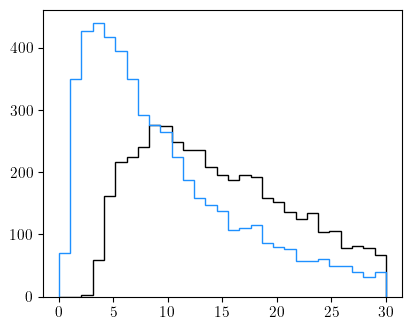

In [ ]:
bins = np.linspace(0,30,30)

fig, ax = pt.std_fig()
_ = ax.hist(df_taus.E, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(p4_alp[:,0], bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)


# _ = ax.hist(df_taus.E[mask_alp_in_acc], bins=bins, histtype='stepfilled', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(p4_alp[:,0][mask_alp_in_acc], bins=bins, histtype='stepfilled', color='dodgerblue', label=r'$a$ in ICARUS ($\times 10^4$)', weights=1e4*eff_dphi*np.ones((mask_alp_in_acc).sum()))

ax.set_title(fr'$\tau^\pm \to \mu^\pm a$ from NuMI ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend(frameon=True)
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$E$ [GeV]')
ax.set_xlim(bins.min(), bins.max())
# ax.set_yscale('log')

fig.savefig('plots/energy_tau_to_mu_alp.pdf', bbox_inches='tight', dpi=300)

In [ ]:
geom_acceptance

np.float64(3.5759523900593936e-05)

NameError: name 'mask_alp_in_acc' is not defined

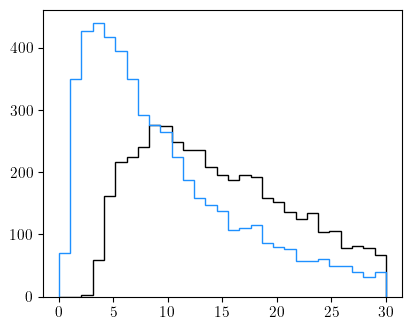

In [59]:
bins = np.linspace(0,30,30)

fig, ax = pt.std_fig()
_ = ax.hist(df_taus.E, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(p4_alp[:,0], bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)


# _ = ax.hist(df_taus.E[mask_alp_in_acc], bins=bins, histtype='stepfilled', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(p4_alp[:,0][mask_alp_in_acc], bins=bins, histtype='stepfilled', color='dodgerblue', label=r'$a$ in ICARUS ($\times 10^4$)', weights=1e4*eff_dphi*np.ones((mask_alp_in_acc).sum()))

ax.set_title(fr'$\tau^\pm \to \mu^\pm a$ from NuMI ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend(frameon=True)
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$E$ [GeV]')
ax.set_xlim(bins.min(), bins.max())
# ax.set_yscale('log')

fig.savefig('plots/energy_tau_to_mu_alp.pdf', bbox_inches='tight', dpi=300)

In [ ]:
geom_acceptance

np.float64(3.5759523900593936e-05)